# Exercício: Limpeza de Dados

Dados retirados de: https://www.kaggle.com/competitions/sberbank-russian-housing-market

In [3]:
!wget https://www.dropbox.com/s/0bl91ufgvfarhjh/housing_market.csv?dl=0 -O housing_market.csv

--2022-04-17 17:51:19--  https://www.dropbox.com/s/0bl91ufgvfarhjh/housing_market.csv?dl=0
Carregou certificado CA "/etc/ssl/certs/ca-certificates.crt"
Resolvendo www.dropbox.com (www.dropbox.com)... 2620:100:601d:18::a27d:512, 162.125.5.18
Conectando-se a www.dropbox.com (www.dropbox.com)|2620:100:601d:18::a27d:512|:443... conectado.
A requisição HTTP foi enviada, aguardando resposta... 301 Moved Permanently
Localização: /s/raw/0bl91ufgvfarhjh/housing_market.csv [redirecionando]
--2022-04-17 17:51:20--  https://www.dropbox.com/s/raw/0bl91ufgvfarhjh/housing_market.csv
Reaproveitando a conexão existente para [www.dropbox.com]:443.
A requisição HTTP foi enviada, aguardando resposta... 302 Found
Localização: https://uc405e154dd4e51d1f6e1b9b764d.dl.dropboxusercontent.com/cd/0/inline/BjniTV_WElJEE631pK6sFjnOJUeMWgAWHY1ajVd9OfS7bCs2zef1V6q588MhS7-nqKVg9u6SgCHywUJp-E_rYtC3UdmdYhXcv42FASL7edOegrZbmaAs5tBM55Eh0cDp_PeHskgCBRvLrzO_DSXKTmUPHc1BQ5P7GTlhFmG11IIgFA/file# [redirecionando]
--2022-04-17

In [3]:
# Tríade de bibliotecas de ciência de dados
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np

%matplotlib inline
plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (12,8)

Matplotlib is building the font cache; this may take a moment.


O objetivo da base de dados que estamos utilizando é inferir a coluna `price_doc`, indicando o preço de uma propriedade. As outras colunas são atributos da propriedade (ex: `full_sq`: área em metros quadrados) ou da vizinhança (ex: `market_shop_km` distância até o mercado mais próximo).

Recomendo checar o dicionário completo de dados: https://www.dropbox.com/s/i9mu82pmxlin6vm/data_dictionary.txt?dl=0

In [5]:
df = pd.read_csv("housing_market.csv")
print(df.shape)
display(df.head())

(30471, 292)


,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


### Selecionando colunas numéricas e nominais

In [6]:
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['id' 'full_sq' 'life_sq' 'floor' 'max_floor' 'material' 'build_year'
 'num_room' 'kitch_sq' 'state' 'area_m' 'raion_popul' 'green_zone_part'
 'indust_part' 'children_preschool' 'preschool_quota'
 'preschool_education_centers_raion' 'children_school' 'school_quota'
 'school_education_centers_raion' 'school_education_centers_top_20_raion'
 'hospital_beds_raion' 'healthcare_centers_raion'
 'university_top_20_raion' 'sport_objects_raion'
 'additional_education_raion' 'culture_objects_top_25_raion'
 'shopping_centers_raion' 'office_raion' 'full_all' 'male_f' 'female_f'
 'young_all' 'young_male' 'young_female' 'work_all' 'work_male'
 'work_female' 'ekder_all' 'ekder_male' 'ekder_female' '0_6_all'
 '0_6_male' '0_6_female' '7_14_all' '7_14_male' '7_14_female' '0_17_all'
 '0_17_male' '0_17_female' '16_29_all' '16_29_male' '16_29_female'
 '0_13_all' '0_13_male' '0_13_female'
 'raion_build_count_with_material_info' 'build_count_block'
 'build_count_wood' 'build_count_frame' 'build_count_brick'
 

## Dados Faltantes

### Q1. Imprima o percentual de dados faltantes

* Por coluna (ordenado do maior para o menor)
* Total

Dica: A função `isnull()` pode ser aplicada a todo o dataframe ou colunas específicas, retornando uma máscara binária indicando a posição de valores NaN.
```
df[col].isnull()
df.isnull()
```

In [7]:
# Calcular dados faltantes(NaN) por coluna
columns                 = df.columns.values
columns_nan_porcentages = {}
columns_length          = len(df.values)

for col in columns:
    column_nan_count             = df[col].isnull().sum()
    columns_nan_porcentages[col] = column_nan_count / columns_length

print(dict(sorted(columns_nan_porcentages.items(), key=lambda item: item[1], reverse=True)))

# Calcular dados faltantes totais
total_count_nan = df.isnull().sum().sum()
print(total_count_nan / df.size)
       

{'hospital_beds_raion': 0.4739260280266483, 'build_year': 0.44649010534606676, 'state': 0.44498047323684814, 'cafe_sum_500_min_price_avg': 0.43585704440287487, 'cafe_sum_500_max_price_avg': 0.43585704440287487, 'cafe_avg_price_500': 0.43585704440287487, 'max_floor': 0.31413475107479244, 'material': 0.31413475107479244, 'num_room': 0.31413475107479244, 'kitch_sq': 0.31413475107479244, 'preschool_quota': 0.2194873814446523, 'school_quota': 0.21938892717665978, 'cafe_sum_1000_min_price_avg': 0.21410521479439468, 'cafe_sum_1000_max_price_avg': 0.21410521479439468, 'cafe_avg_price_1000': 0.21410521479439468, 'life_sq': 0.20947786419874634, 'raion_build_count_with_material_info': 0.16379508385021824, 'build_count_block': 0.16379508385021824, 'build_count_wood': 0.16379508385021824, 'build_count_frame': 0.16379508385021824, 'build_count_brick': 0.16379508385021824, 'build_count_monolith': 0.16379508385021824, 'build_count_panel': 0.16379508385021824, 'build_count_foam': 0.16379508385021824, '

### Q2. Decida como lidar com os dados faltantes

Dentre as alternativas a seguir, defina como tratar as diferentes ocorrências de dados faltantes e **justifique suas escolhas**.

* Remover a instância/amostra/linha
* Remover o atributo/dimensão/coluna
* Imputar dados (zero, média, moda, mediana, etc.)

**Atenção**: Dados numéricos e não-numéricos devem receber tratamentos diferentes caso decida imputar dados. Estes dados foram separados para você na célula "Selecionando colunas numéricas e nominais" deste notebook.

In [8]:
"""
Linhas que possui contadores ('count'), substitui os nan com o valor 0,
Colunas com médias ('avg') possui alguns casos em especificos
* Se a porcentagem de nans é maior que 0.2 será difícil criar imputar dados sem criar nenhum tipo de vies,
para evitar isso, retiramos a coluna
* Se a porcentagem de nans é menor que 0.2, podemos estimar o valores restantes com uma média
"""

import statistics as st

new_df = df.copy()

for col in columns:
    if columns_nan_porcentages[col] > 0:
        print(f' coluna: {col} | porcentagem: {columns_nan_porcentages[col]} | {col in non_numeric_cols}')
        
        if 'count' in col:
            new_df[col].fillna(0, inplace=True)
        elif 'ID' in col:
            m = st.mode(df[col])
        elif 'avg' in col:
            
            if missing_per_column[col] > 0.2:
                new_df.drop(col, axis=1, inplace=True)
                     

 coluna: life_sq | porcentagem: 0.20947786419874634 | False
 coluna: floor | porcentagem: 0.005480620918250139 | False
 coluna: max_floor | porcentagem: 0.31413475107479244 | False
 coluna: material | porcentagem: 0.31413475107479244 | False
 coluna: build_year | porcentagem: 0.44649010534606676 | False
 coluna: num_room | porcentagem: 0.31413475107479244 | False
 coluna: kitch_sq | porcentagem: 0.31413475107479244 | False
 coluna: state | porcentagem: 0.44498047323684814 | False
 coluna: preschool_quota | porcentagem: 0.2194873814446523 | False
 coluna: school_quota | porcentagem: 0.21938892717665978 | False
 coluna: hospital_beds_raion | porcentagem: 0.4739260280266483 | False
 coluna: raion_build_count_with_material_info | porcentagem: 0.16379508385021824 | False
 coluna: build_count_block | porcentagem: 0.16379508385021824 | False
 coluna: build_count_wood | porcentagem: 0.16379508385021824 | False
 coluna: build_count_frame | porcentagem: 0.16379508385021824 | False
 coluna: build

NameError: name 'missing_per_column' is not defined

## Dados irregulares/inconsistentes/redundantes

### Q3. Busque atributos não-informativos ou muito repetitivos.

Um exemplo muito comum de dimensões que podem ser descartadas são aquelas que repetem o mesmo valor na maior parte da base. Verifique e remova a seguir **atributos com pelo menos 95% de predominância do mesmo valor**. 

In [9]:
"""
Calcular o percentual de cada valor unico dentro 
do array, se a porcentagem desse valor for maior ou igual a 
95%, entao essa coluna sera removida
"""
for col in columns:
    _, counts = np.unique(df[col], return_counts=True)
    if all(i/len(df[col]) >= 0.95 for i in counts):
        df.drop(columns=[col])
    

### Q4. Existem outliers na base?

Verifique a distribuição dos dados de cada dimensão que não foi removida nos passos anteriores e busque pontos fora da curva ou evidentemente distoantes da distribuição original. 

**Decida se tratam-se de erros que devem ser descartados/corrigidos.**

A seguir alguns exemplos de como explorar a distribuição de um atributo

In [27]:
def calculate_upper_lower_fence(col_description):
    if not '25%' in col_description:
        return []
    
    q1 = col_description['25%']
    q3 = col_description['75%']
    iqr = q3 - q1
    
    upper_fence = q3 + ( 1.5 * iqr )
    lower_fence = q1 - ( 1.5 * iqr )
    
    return [ lower_fence, upper_fence ]
    

for col in columns:
    fences = calculate_upper_lower_fence(df[col].describe())
    
    if (len(fences) != 0):
        lower_outliers = len([i for i in df[col] if i < fences[0]])
        higher_outliers = len([i for i in df[col] if i > fences[1]])
    
    print(f' lower_outliers {lower_outliers}')
    print(f' higher_outliers {higher_outliers}')




 lower_outliers 0
 higher_outliers 0
 lower_outliers 0
 higher_outliers 0
 lower_outliers 2
 higher_outliers 961
 lower_outliers 0
 higher_outliers 750
 lower_outliers 0
 higher_outliers 272
 lower_outliers 0
 higher_outliers 126
 lower_outliers 0
 higher_outliers 3708
 lower_outliers 923
 higher_outliers 2
 lower_outliers 0
 higher_outliers 476
 lower_outliers 0
 higher_outliers 107
 lower_outliers 0
 higher_outliers 1
 lower_outliers 0
 higher_outliers 1
 lower_outliers 0
 higher_outliers 1
 lower_outliers 0
 higher_outliers 4144
 lower_outliers 0
 higher_outliers 0
 lower_outliers 0
 higher_outliers 60
 lower_outliers 0
 higher_outliers 293
 lower_outliers 0
 higher_outliers 508
 lower_outliers 0
 higher_outliers 1223
 lower_outliers 0
 higher_outliers 508
 lower_outliers 0
 higher_outliers 508
 lower_outliers 0
 higher_outliers 1638
 lower_outliers 0
 higher_outliers 0
 lower_outliers 0
 higher_outliers 3137
 lower_outliers 0
 higher_outliers 752
 lower_outliers 0
 higher_outliers 

 lower_outliers 0
 higher_outliers 2452
 lower_outliers 0
 higher_outliers 2103
 lower_outliers 0
 higher_outliers 2219
 lower_outliers 0
 higher_outliers 3046
 lower_outliers 0
 higher_outliers 6424
 lower_outliers 0
 higher_outliers 1948
 lower_outliers 0
 higher_outliers 3399
 lower_outliers 0
 higher_outliers 2189
 lower_outliers 0
 higher_outliers 1152
 lower_outliers 0
 higher_outliers 2053
 lower_outliers 0
 higher_outliers 949
 lower_outliers 0
 higher_outliers 2113
 lower_outliers 0
 higher_outliers 578
 lower_outliers 0
 higher_outliers 557
 lower_outliers 0
 higher_outliers 3738
 lower_outliers 0
 higher_outliers 4110
 lower_outliers 0
 higher_outliers 909
 lower_outliers 0
 higher_outliers 2129
 lower_outliers 0
 higher_outliers 2556
 lower_outliers 366
 higher_outliers 996
 lower_outliers 366
 higher_outliers 791
 lower_outliers 376
 higher_outliers 991
 lower_outliers 0
 higher_outliers 2169
 lower_outliers 0
 higher_outliers 2777
 lower_outliers 0
 higher_outliers 2147
 

<AxesSubplot:>

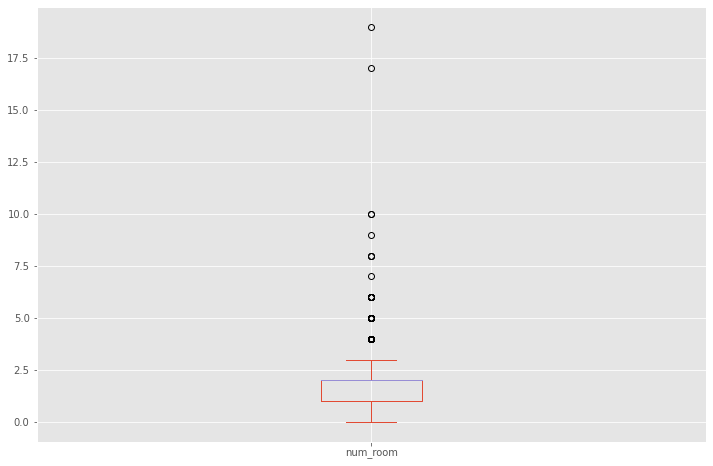

In [15]:
df['num_room'].plot(kind="box")

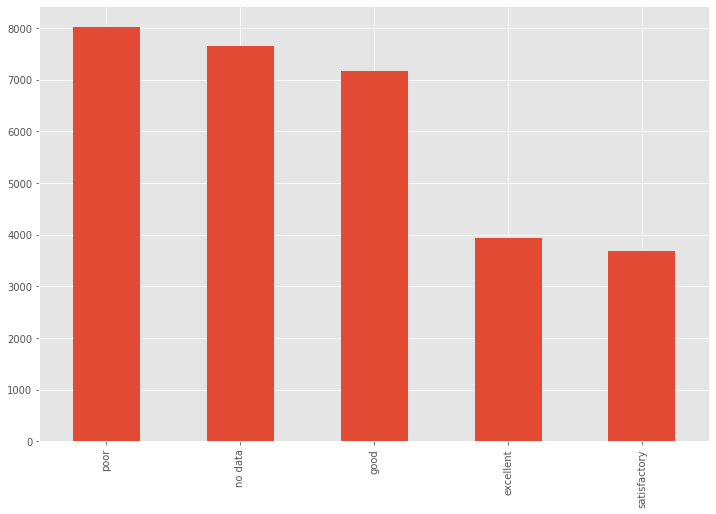

In [ ]:
df['ecology'].value_counts().plot(kind="bar")
## TODO...

### Q5. Busque instâncias duplicadas

Note que duplicatas não precisam ser idênticas em todas as dimensões, podemos ser mais espertos e selecionar um conjuntos de características-chave que indicam a ocorrência de uma duplicata.

Faça a seguir:
- Busque e remova duplicatas baseando-se em todos os atributos da base
- Busque e remova duplicatas baseando-se nos atributos-chave `{timestamp, full_sq, life_sq, floor, build_year, num_room, price_doc}`

In [ ]:
## TODO...

### Q6. Corrija inconsistências nominais

Verifique os atributos não-numéricos (variável `df_non_numeric`) e identifique dimensões que precisam ser normalizadas (ex: converter para letra minúscula, remover espaços, símbolos, etc.)

In [ ]:
## TODO...

## Conversão simbólica-numérica

### Q7. Converta os atributos nominais em numéricos 

Variável `df_non_numeric`. Utilize a(s) abordagem(ns) de sua escolha. **Justifique suas escolhas**.

In [ ]:
## TODO...

## Redução de dimensionalidade

### Q8. Confira se existe alta correlação entre atributos da base.

* Apresente a matriz de correlação 
* Localize e aponte grupos de atributos que apresentam alta correlação entre si. 
* Aproveite e imprima o top10 atributos com maior correlação (top10 positiva e top10 negativa) com a classe a ser predita, `price_doc`.

In [ ]:
## TODO...